<a href="https://colab.research.google.com/github/rittikcodes/fake_news_detection/blob/development/fake_news_detection_Word2Vec_final_27052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Import Modules

## Basic Modules

In [68]:
# Data manipulation and analysis
import numpy as np  # For numerical operations, provides support for arrays and matrices
import pandas as pd  # For data manipulation and analysis, offers data structures like DataFrame and Series

# Data visualization
import seaborn as sns  # For statistical data visualization, simplifies creating complex visualizations
import matplotlib.pyplot as plt  # For plotting graphs, provides extensive control over plot styles and formatting
# To display plots inline in Jupyter notebooks
# Ensures plots are displayed inline within Jupyter notebooks
%matplotlib inline

# Machine Learning utilities
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score  # For calculating model accuracy and generating classification reports

# String operations and text processing
import re  # For regular expressions, used for matching and manipulating strings
import string  # For string operations, provides a collection of string constants and functions

# For generating word cloud visualizations
from wordcloud import WordCloud  # For creating word cloud visualizations to display frequent terms in text data

# For natural language processing tasks
import nltk  # Comprehensive library for natural language processing

# Downloading necessary datasets and models from NLTK
nltk.download('wordnet')  # Download WordNet, a lexical database for English
nltk.download('punkt')  # Download the punkt tokenizer for sentence splitting
nltk.download('stopwords')  # Download the stopwords dataset
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger

from nltk.corpus import stopwords, wordnet  # For accessing common stopwords and WordNet lexical database
from nltk.tokenize import word_tokenize, sent_tokenize  # For tokenizing text into words and sentences
from nltk.stem import WordNetLemmatizer  # For lemmatizing words, reducing them to their base form

# Keras for deep learning and NLP preprocessing
from keras.preprocessing.text import Tokenizer  # For tokenizing text data
from keras.preprocessing.sequence import pad_sequences  # For padding sequences to ensure uniform length

# Ignore warnings
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # To ignore warnings during execution, making the output cleaner


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Special Modules and Algorithm:
##### 1. gensim -> Word2Vec
##### 2. xgboost

In [4]:
# Machine Learning models
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes classifier for binary/boolean features
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
import xgboost as xgb  # For using XGBoost classifier

# Gensim models for word embeddings
from gensim.models import Word2Vec, KeyedVectors  # For working with pre-trained word vectors

# Load pre-trained word vectors from a local file
wv = KeyedVectors.load('/content/drive/MyDrive/fake_news_detection/word2vec.kv')  # Load pre-trained Word2Vec model from local file

# If not download -> loading pre-trained word vectors from Gensim's API
# import gensim.downloader as api  # For downloading datasets and pre-trained models from Gensim's API
# wv = api.load('word2vec-google-news-300')  # Load pre-trained Word2Vec model from Gensim's repository


In [5]:
# check the vetorization of any word
vec_king = wv["king"]
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

# Data Collection
##### Data Source:  https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

In [6]:
# import the datasets
true_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/Fake.csv')
test_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/news.csv')

In [7]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [11]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
total_duplicates_true_news = true_news.duplicated().sum()
print('Duplicate true news:', total_duplicates_true_news)
print("------------------------------------------------")
total_duplicates_fake_news = fake_news.duplicated().sum()
print('Duplicate fake news:', total_duplicates_fake_news)

Duplicate true news: 206
------------------------------------------------
Duplicate fake news: 3


In [14]:
true_news.drop_duplicates(inplace=True)
fake_news.drop_duplicates(inplace=True)

# check after reoving duplicate
total_duplicates_true_news = true_news.duplicated().sum()
print('Duplicate true news:', total_duplicates_true_news)
print("------------------------------------------------")
total_duplicates_fake_news = fake_news.duplicated().sum()
print('Duplicate fake news:', total_duplicates_fake_news)

Duplicate true news: 0
------------------------------------------------
Duplicate fake news: 0


In [15]:
# assigning fake news as 0 and true news as 1
fake_news["class"] = 0
true_news["class"] = 1

In [16]:
# Taking the last 10 rows from the fake_news dataset for manual testing
fake_news_manual_testing = fake_news.tail(10)

# Removing the last 10 rows from the fake_news dataset
fake_news.drop(fake_news.tail(10).index, inplace=True)

# Taking the last 10 rows from the true_news dataset for manual testing
true_news_manual_testing = true_news.tail(10)

# Removing the last 10 rows from the true_news dataset
true_news.drop(true_news.tail(10).index, inplace=True)

In [17]:
fake_news_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [18]:
true_news_manual_testing.head()

,title,text,subject,date,class
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [61]:
# concatination of two dataset
data_merge = pd.concat(
    [fake_news, true_news],
    ignore_index = True, # ignore_index = True => While concating it ignores the indexes in both the datasets
    axis = 0) # axis = 0 => row-wise concatination (by default: axis = 0)
data_merge = data_merge.sample(frac=1).reset_index(drop=True) # suffles the rows and resets the index
data_merge.head(10)

,title,text,subject,date,class
0,Supreme Court denies stay request in North Car...,(Reuters) - The U.S. Supreme Court on Friday r...,politicsNews,"February 20, 2016",1
1,BUZZFEED’S EDITOR-IN-CHIEF Attempts Lame Expla...,Here s @chucktodd s interview with @BuzzFeedBe...,politics,"Jan 11, 2017",0
2,ANGRY GREEN BAY PACKERS Fans and Owners Lash O...,Have Americans already forgotten about the rea...,left-news,"Sep 28, 2017",0
3,Ann Coulter Slips Up During Interview And Giv...,Ann Coulter will be wishing she had the chance...,News,"January 18, 2016",0
4,State Department website posts article on Trum...,WASHINGTON (Reuters) - A U.S. State Department...,politicsNews,"April 24, 2017",1
5,"GERMANY’S Anti-Trump, Open Borders ANGELA MERK...",In what has to be considered an historic about...,left-news,"Nov 28, 2016",0
6,WOW! Stepson Of New Roy Moore Accuser Makes Em...,"Yesterday, Beverly Young Nelson sat with the s...",politics,"Nov 14, 2017",0
7,Embarrassing: Watch Trump Attorney Gets Grill...,The question as to whether Donald Trump is bei...,News,"June 18, 2017",0
8,Donald Trump Has Become So Toxic That He Can’...,Since the coronation inauguration of Donald Tr...,News,"February 9, 2017",0
9,DNC CHAIR TOM PEREZ DOUBLES DOWN: No Regrets F...,DNC Chair Tom Perez was on MSNBC (video below)...,politics,"Apr 4, 2017",0


# Exploratory Data Analysis - EDA

In [20]:
data_merge['class'].value_counts()

class
0    23468
1    21201
Name: count, dtype: int64

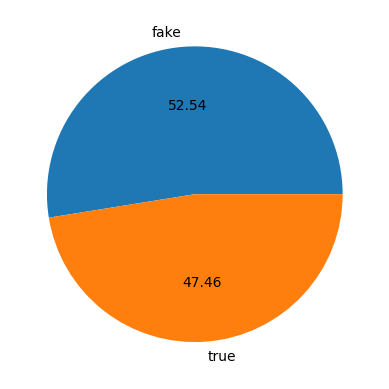

In [21]:
import matplotlib.pyplot as plt
plt.pie(data_merge['class'].value_counts(), labels=['fake','true'],autopct="%0.2f")
plt.show()

In [33]:
data_merge['character_count'] = data_merge['text'].apply(len)

In [34]:
data_merge['word_count'] = data_merge['text'].apply(lambda x: len(word_tokenize(x)))

In [35]:
data_merge['sentence_count'] = data_merge['text'].apply(lambda x: len(sent_tokenize(x)))

In [36]:
data_merge.head()

,title,text,subject,date,class,character_count,word_count,sentence_count
0,HUNDREDS RALLY After Atheist Group Forces Mayo...,The group called Freedom from Religion has bee...,politics,"Feb 6, 2017",0,399,71,3
1,Sarah Palin’s Pick To Replace Paul Ryan Wants...,The media has been telling us for months now t...,News,"May 8, 2016",0,4079,818,28
2,"Boiler Room EP #112 – UK Election, Omran & Tec...",Tune in to the Alternate Current Radio Network...,Middle-east,"June 9, 2017",0,1416,259,5
3,Iraq hangs 42 Sunni militants convicted of ter...,BAGHDAD (Reuters) - Iraq on Sunday executed 42...,worldnews,"September 25, 2017",1,1840,317,10
4,Clinton's 'girl power' push wins over women in...,"DES MOINES, Iowa (Reuters) - If Hillary Clinto...",politicsNews,"January 31, 2016",1,4110,831,26


In [37]:
data_merge[['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,44669.000000,44669.000000,44669.00000
mean,2466.280687,452.967472,14.85115
std,2171.039935,394.659663,12.69114
min,1.000000,0.000000,0.00000
25%,1232.000000,225.000000,7.00000
50%,2184.000000,403.000000,13.00000
75%,3101.000000,571.000000,19.00000
max,51794.000000,9958.000000,321.00000


In [38]:
# fake
data_merge[data_merge['class'] == 0][['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,23468.000000,23468.000000,23468.000000
mean,2545.968894,469.781064,14.913329
std,2528.702861,456.380860,13.778696
min,1.000000,0.000000,0.000000
25%,1433.000000,266.000000,7.000000
50%,2166.000000,403.000000,13.000000
75%,3031.250000,562.000000,19.000000
max,51794.000000,9958.000000,288.000000


In [39]:
# true
data_merge[data_merge['class'] == 1][['character_count', 'word_count', 'sentence_count']]

,character_count,word_count,sentence_count
3,1840,317,10
4,4110,831,26
5,889,168,3
7,632,115,3
10,393,71,2
...,...,...,...
44661,2575,484,15
44663,313,58,2
44665,2837,540,21
44666,7186,1315,48


<Axes: xlabel='word_count', ylabel='Count'>

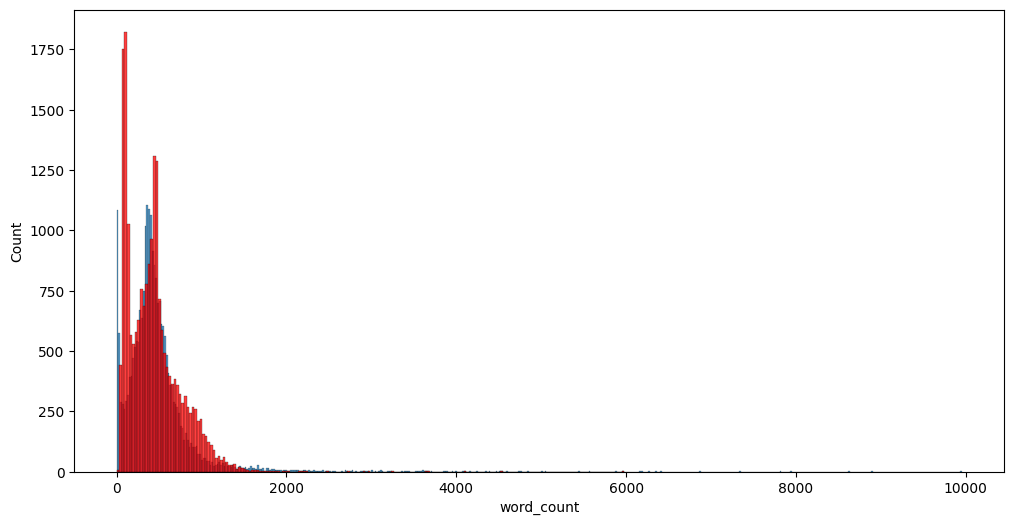

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(data_merge[data_merge['class'] == 0]['word_count'])
sns.histplot(data_merge[data_merge['class'] == 1]['word_count'], color = 'red')

<Axes: xlabel='sentence_count', ylabel='Count'>

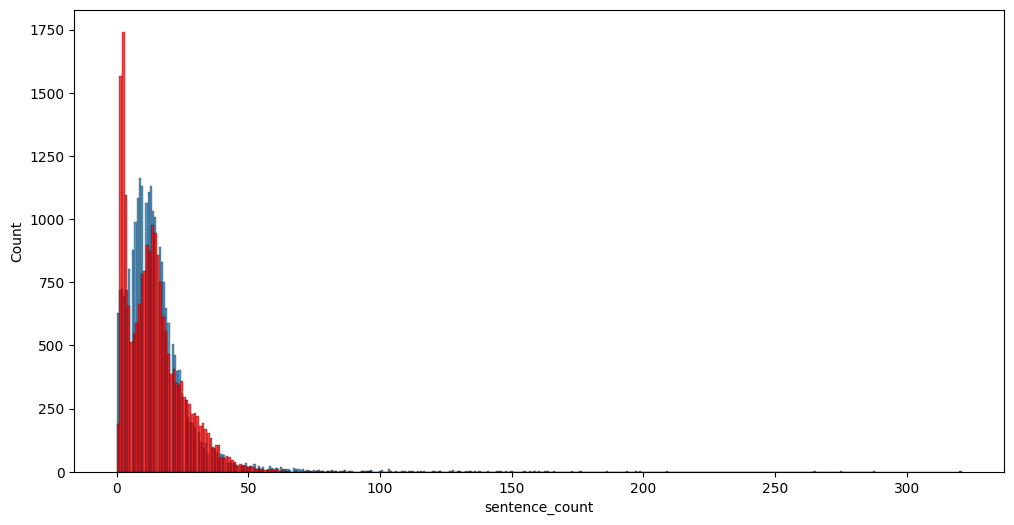

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data_merge[data_merge['class'] == 0]['sentence_count'])
sns.histplot(data_merge[data_merge['class'] == 1]['sentence_count'], color = 'red')

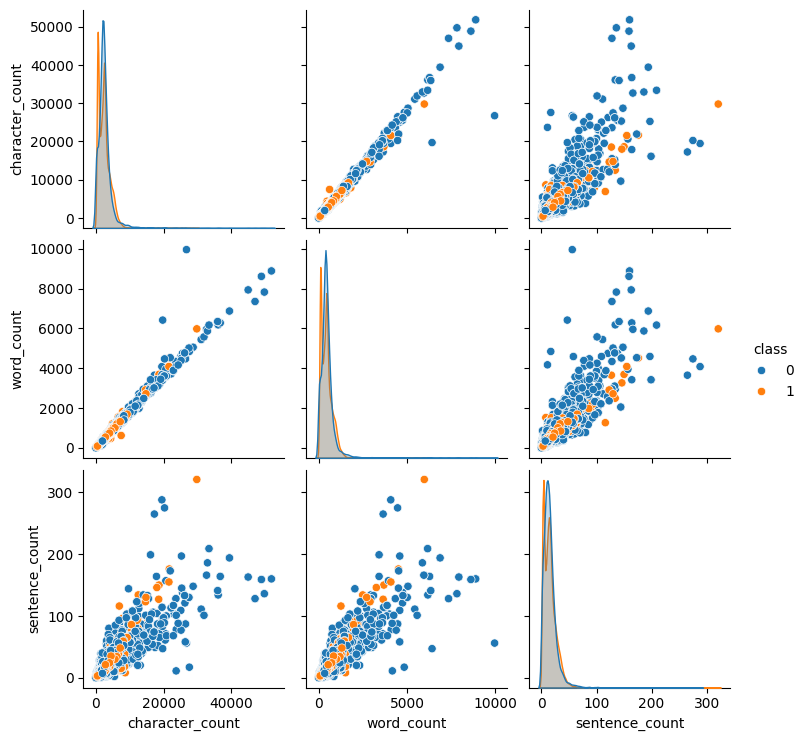

In [43]:
sns.pairplot(data_merge, hue = 'class')

In [48]:
subset = data_merge[['character_count', 'word_count', 'sentence_count', 'class']]

<Axes: >

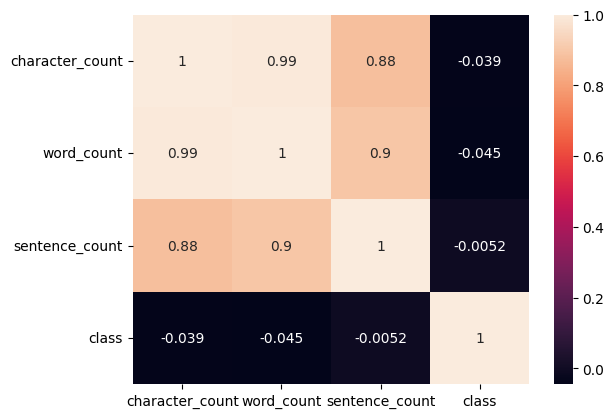

In [49]:
sns.heatmap(subset.corr(),annot=True)

In [46]:
# Convert 'date' column to datetime format
data_merge['date'] = pd.to_datetime(data_merge['date'], format='mixed', dayfirst=True, errors='coerce')

# Extract year from 'date' column
data_merge['year'] = data_merge['date'].dt.year

# Extract month name from 'date' column
data_merge['month'] = data_merge['date'].dt.month_name()

In [27]:
data_merge.head()

,title,text,subject,date,class,year,month
0,U.S. lawmaker Scalise improving after baseball...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,2017-06-16,1,2017.0,June
1,Trump to say in security speech that China is ...,WASHINGTON (Reuters) - President Donald Trump ...,worldnews,2017-12-18,1,2017.0,December
2,LORETTA LYNCH Gives Radical Black Lives Matter...,Eric Holder in a dress Eric Holder got the bal...,left-news,2016-07-08,0,2016.0,July
3,Watch Marge Simpson Have The Panic Attack We’...,If there s one thing that can likely unite all...,News,2016-02-21,0,2016.0,February
4,Maltese prime minister promises reward to unco...,VALLETTA (Reuters) - Prime Minister Joseph Mus...,worldnews,2017-10-18,1,2017.0,October


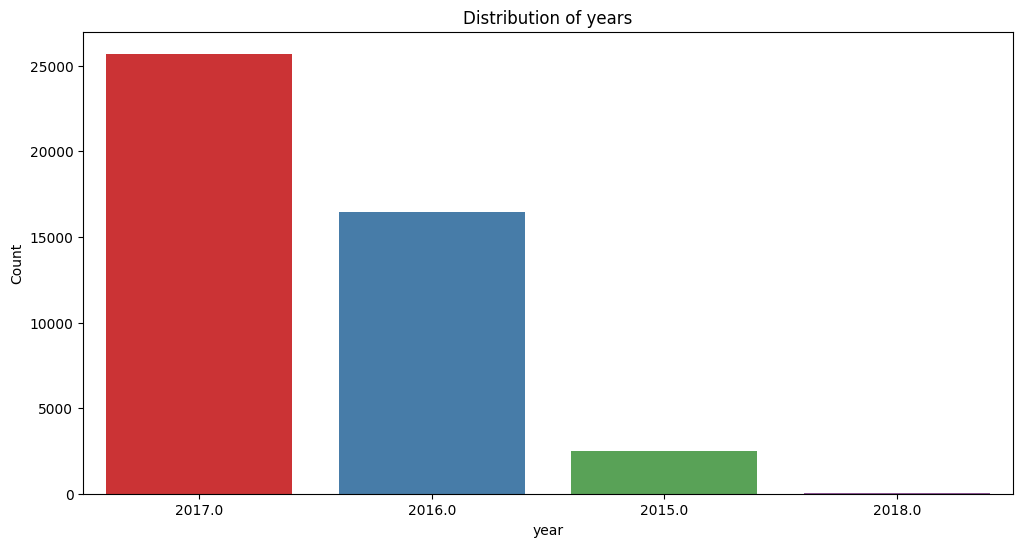

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=data_merge, order=data_merge['year'].value_counts().index, palette='Set1')
plt.title('Distribution of years')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
data_merge['subject'] = data_merge['subject'].str.lower()

In [ ]:
data_merge.head()

,title,text,subject,date,class,clean_text,year,month
0,Israel interprets U.S. settlements statement a...,JERUSALEM (Reuters) - Israeli officials welcom...,politicsnews,2017-02-03,1,jerusalem reuters israeli official welcome fri...,2017.0,February
1,WATCH: Kathy Griffin PERFECTLY Responds To Tr...,"The hell with parody, this should be a real ca...",news,2016-10-19,0,hell parody real campaign ad donald trump long...,2016.0,October
2,WATCH: TEACHER CAUGHT ON VIDEO Calling Trump T...,This unhinged high school teacher was caught t...,politics,2017-09-04,0,unhinged high school teacher caught tell stude...,2017.0,September
3,Britons can change terms of Brexit to diverge ...,LONDON (Reuters) - British voters will be able...,worldnews,2017-12-09,1,london reuters british voter able change term ...,2017.0,December
4,Macedonian nationals arrested in Greece over w...,ATHENS (Reuters) - Two Macedonian nationals wa...,worldnews,2017-10-19,1,athens reuters two macedonian national want in...,2017.0,October


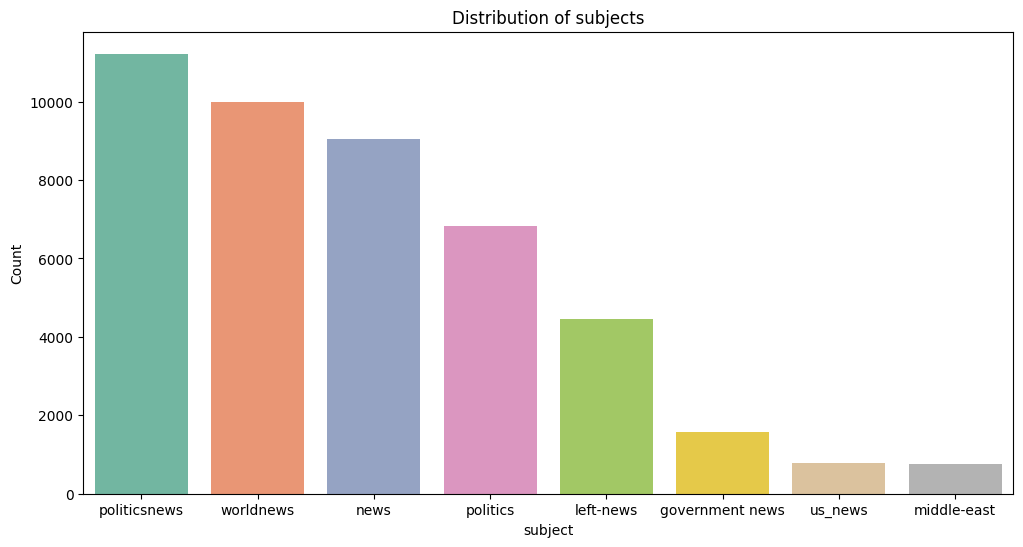

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=data_merge, order=data_merge['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of subjects')
plt.xlabel('subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

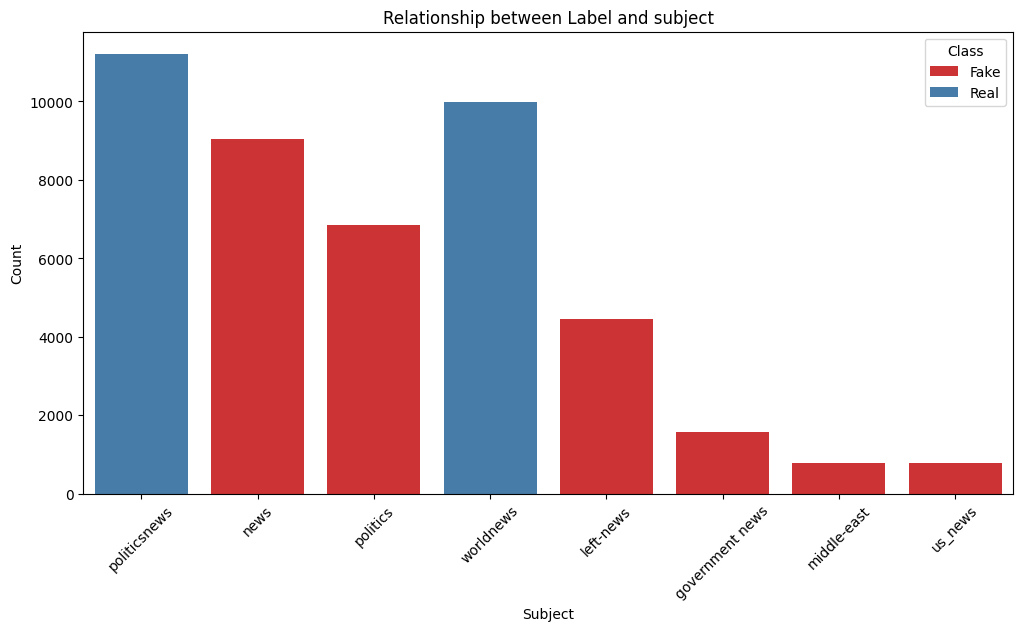

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', hue='class', data=data_merge, hue_order=[0, 1], palette='Set1')

# Set legend labels
plt.legend(title='Class', labels=['Fake', 'Real'])

plt.title('Relationship between Label and subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

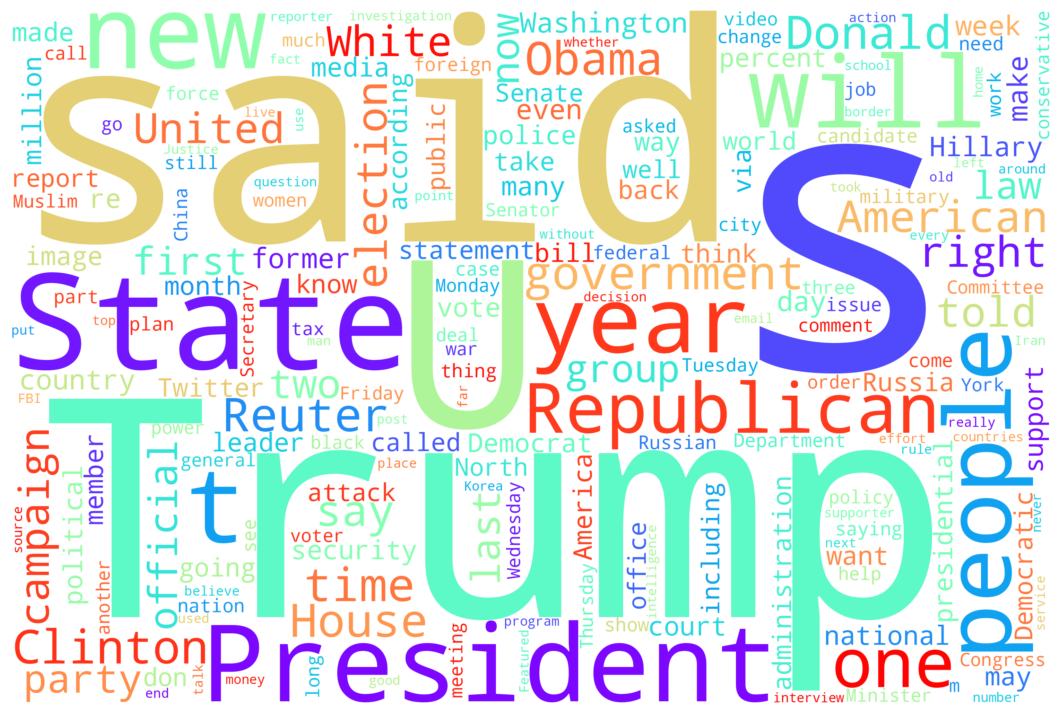

In [51]:
all_words = " ".join([sentence for sentence in data_merge['text']])

wordcloud = WordCloud(
    width=3000,          # Width of the word cloud image
    height=2000,         # Height of the word cloud image
    random_state=1,      # For reproducibility
    background_color='white', # Background color of the word cloud image
    colormap='rainbow',  # Color map to use for the words
    collocations=False,  # Do not include collocations (bigrams)
).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

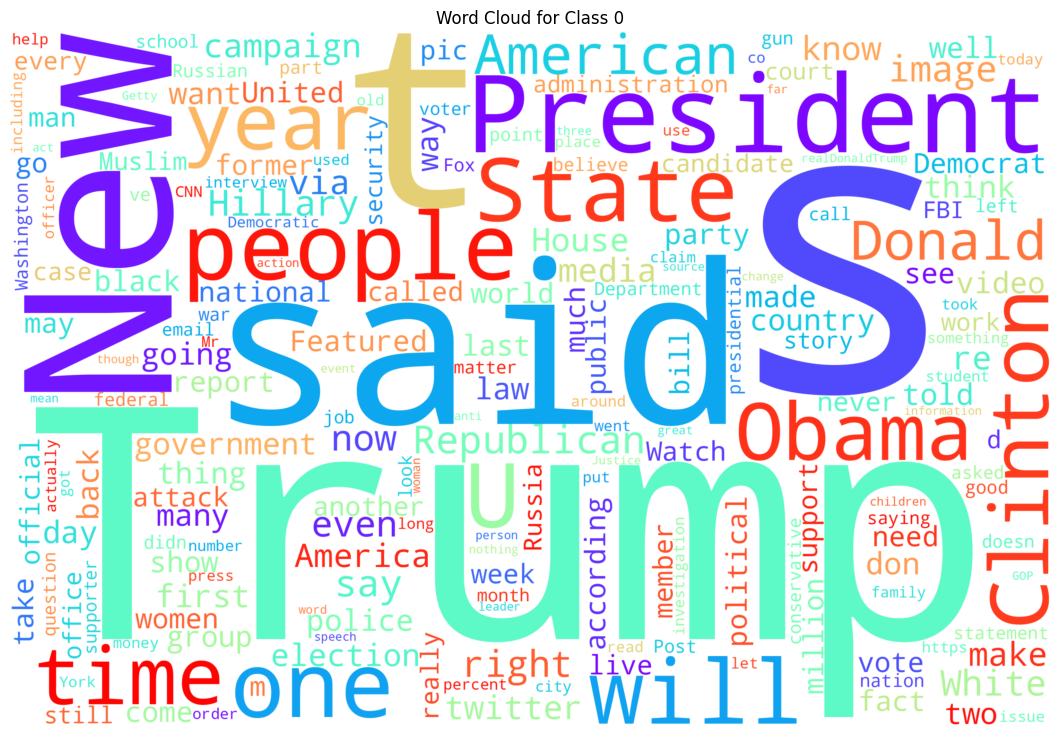

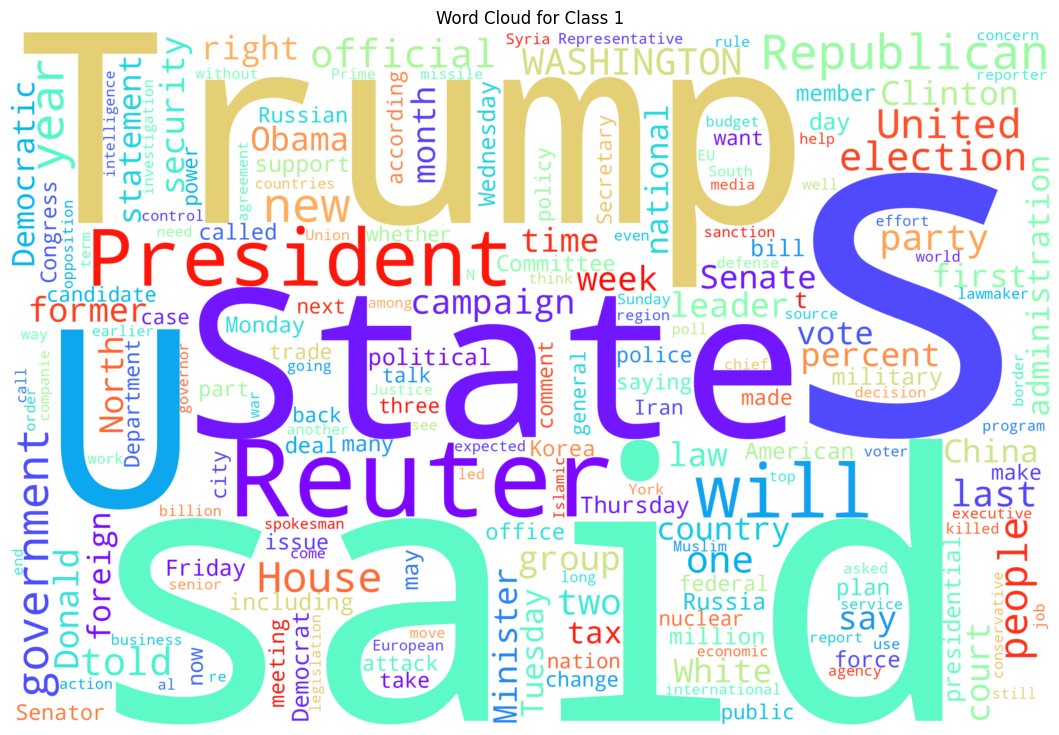

In [53]:
classes = data_merge['class'].unique()

# Plot word clouds for each class separately
for class_value in classes:
    # Filter data for the current class
    class_data = data_merge[data_merge['class'] == class_value]

    # Combine all text entries into a single string
    all_words = " ".join([sentence for sentence in class_data['text'] if isinstance(sentence, str)])

    # Generate the word cloud
    wordcloud = WordCloud(
        width=3000,          # Width of the word cloud image
        height=2000,         # Height of the word cloud image
        random_state=1,      # For reproducibility
        background_color='white', # Background color of the word cloud image
        colormap='rainbow',  # Color map to use for the words
        collocations=False,  # Do not include collocations (bigrams)
    ).generate(all_words)

    # Plot the word cloud
    plt.figure(figsize=(15, 9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {class_value}')
    plt.axis('off')
    plt.show()

# Data Preprocessing

## Data cleaning
##### Checking duplicate values and removing them

## Text Preprocessing

### Lammatize and removing stopwords

In [69]:
stopword = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def wordopt(text):
    text = text.lower()  # Convert each letter to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets and the brackets themselves
    text = re.sub(r'\W', ' ', text)  # Replace non-word characters with spaces
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with spaces
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing digits (revised regex pattern)

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word considering its part of speech
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stopword]

    text = ' '.join(lemmatized_words)
    return text

# Apply the modified wordopt function to your DataFrame
data_merge["clean_text"] = data_merge["text"].apply(wordopt)

In [77]:
str1 = """This wasn’t a tall run-chase like 2014. No tactical masterstroke like Manvinder Bisla of 2012 fame. But Kolkata Knight Riders’ IPL 2024 title win on Sunday would still taste like ‘mishti doi’ because the title No.3 came after a decade.

Kolkata Knight Riders' Mitchell Starc, Andre Russel and teammates celebrate the dismissal of Sunrisers Hyderabad's Abhishek Sharma in the Indian Premier League 2024 final(ANI)
Kolkata Knight Riders' Mitchell Starc, Andre Russel and teammates celebrate the dismissal of Sunrisers Hyderabad's Abhishek Sharma in the Indian Premier League 2024 final(ANI)
The transformation led by mentor Gautam Gambhir’s return to the Kolkata franchise. Gambhir was captain when KKR last won. This time it was skipper Shreyas Iyer’s turn -- he stayed unbeaten along with Venkatesh Iyer (52*, 26b) in their eight-wicket win at the MA Chidambaram Stadium on Sunday as Sunrisers Hyderabad went down tamely after posting the lowest first innings score in an IPL final – 113.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
SRH’s road to the playoffs and their gung-ho approach was set up hugely with the efforts of their dynamic opening southpaws Travis Head and Abhishek Sharma – Travishek as the stadium announcer yelled to get the neutral Chennai fans going. Mitchell Starc took two balls to get rid of his compatriot Head earlier in the week in Qualifier 1. Here, he knocked back Abhishek Sharma’s (2) stumps the fifth ball with arguably the most eye-catching delivery of the competition.

Right in the first over of the contest, the Australia left-armer - his ₹24.5 crore price tag will no longer feel a burden – landed body blows on the super-aggressive SRH batting line-up for two knockout matches in a row.

Abhishek, playing his first IPL final, was nervous after skipper Pat Cummins chose to bat. There was some juice on offer, off the pitch. Starc angled one in from over the wicket and got it to leave the left-hander, so late he had zero reaction time. It’s a kind of fast bowler’s delivery more common in Test cricket. When bowlers get it right in T20s, it creates a spectacle – capacity crowd up in spirits to watch lighted stumps shattering as they suck the life out of one dressing room and lift up the other.

Backing up his senior bowling partner, Vaibhav Arora produced a classic red-ball dismissal – pitched on leg at pace from over the wicket and angling away from Head to catch the edge to the keeper. The man walking back for a first-ball duck had made India’s life miserable in the World Test Championship final and the ODI World Cup title clash. No final heroics for him this time. Not the way Head would have wanted his 567-run season to end.

Rahul Tripathi hung around for a while, but that wasn’t his game. The constant messaging to their batters from the SRH camp was not to compromise on intent. “We are playing a particular style, won’t work every time but when it does, it will be damaging,” Cummins said at the toss. Tripathi (9) attempted to flick another of Starc’s hissing angled balls, only managing to top edge to Ramandeep Singh in front of square.

Arora’s 17-run sixth over when Aiden Markram went after him, gave some element of respectability to the powerplay score – 40/3. But what was to follow was going to leave the orange section – the crowd was equally split between the teams – and SRH’s Chennai-based owners largely disappointed.

SRH were four wickets down at the halfway mark, six-down in 12 overs and the batters could never arrest the slide. KKR bowlers had discovered the bowling mantra on a pitch where there was enough help off the surface for pacers, some grip for off-pace balls and bounce for the spinners. The only way SRH could transfer pressure to their opponents was through some release shots. Nitish Reddy (13) tried to force the pace but Harshit Rana’s 146 kph screamer got him caught behind. Markram (20) holed out trying to pull Andre Russell out of the park.

Such is KKR’s collective bowling strength that there is no respite with spin. This has been Sunil Narine’s season. He wasn’t going to allow the match’s grip to loosen and delivered another top-draw bowling performance (4-0-16-1).

Russell, in the playing eleven for the first time in an IPL final, also left his mark with a spell that read 2.3-0-19-3. Starc wasn’t even required to bowl his final over as SRH folded up in 18.3 overs. But it was the Aussie pace ace’s thrilling opening spell (3-0-14-2) that gave KKR a huge head start."""

wordopt(str1)

'tall run chase like tactical masterstroke like manvinder bisla fame kolkata knight rider ipl title win sunday would still taste like mishti doi title come decade kolkata knight rider mitchell starc andre russel teammate celebrate dismissal sunrisers hyderabad abhishek sharma indian premier league final ani kolkata knight rider mitchell starc andre russel teammate celebrate dismissal sunrisers hyderabad abhishek sharma indian premier league final ani transformation lead mentor gautam gambhir return kolkata franchise gambhir captain kkr last time skipper shreyas iyer turn stayed unbeaten along venkatesh iyer eight wicket win chidambaram stadium sunday sunrisers hyderabad go tamely post low first inning score ipl final unlock exclusive access late news india general election ht app download download srh road playoff gung ho approach set hugely effort dynamic opening southpaw travis head abhishek sharma travishek stadium announcer yell get neutral chennai fan go mitchell starc take two ba

In [70]:
# Combine checks for NaN and non-string values in the 'clean_text' column
problematic_values = data_merge['clean_text'].apply(lambda x: pd.isna(x) or not isinstance(x, str))
print(data_merge[problematic_values])

Empty DataFrame
Columns: [title, text, subject, date, class, clean_text]
Index: []


# Model training

## Tokenization

### Assigning X and y

In [71]:
X = data_merge["clean_text"]
y = data_merge["class"]

### Split the data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Tokenize the text

In [73]:
X_train_tokens = [word_tokenize(text) for text in X_train]
X_test_tokens = [word_tokenize(text) for text in X_test]

In [74]:
X_train_tokens[10]

['donald',
 'trump',
 'kick',
 'monday',
 'morning',
 'tweet',
 'something',
 'stupid',
 'necessary',
 'check',
 'multiple',
 'time',
 'parody',
 'account',
 'apparently',
 'emperor',
 'told',
 'wear',
 'fine',
 'clothing',
 'long',
 'completely',
 'unaware',
 'stand',
 'naked',
 'figurative',
 'claw',
 'eye',
 'make',
 'awful',
 'visage',
 'disappear',
 'manner',
 'look',
 'pretty',
 'stupid',
 'u',
 'accord',
 'donald',
 'negative',
 'poll',
 'fake',
 'news',
 'reflect',
 'actual',
 'feeling',
 'million',
 'people',
 'protest',
 'street',
 'million',
 'gathering',
 'denounce',
 'online',
 'sorry',
 'people',
 'want',
 'border',
 'security',
 'extreme',
 'vet',
 'trump',
 'say',
 'negative',
 'poll',
 'fake',
 'news',
 'like',
 'cnn',
 'abc',
 'nbc',
 'poll',
 'election',
 'sorry',
 'people',
 'want',
 'border',
 'security',
 'extreme',
 'vet',
 'donald',
 'j',
 'trump',
 'realdonaldtrump',
 'february',
 'course',
 'reference',
 'muslim',
 'ban',
 'stop',
 'people',
 'seven',
 'muslim

## Vectorization

### Word2Vec training

In [75]:
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=200, window=5, min_count=1, workers=4)

### Function to generate average vectors

In [79]:
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

### Generate average vectors for each document

In [80]:
X_train_vectors = [get_average_vector(tokens, w2v_model, 200) for tokens in X_train_tokens]
X_test_vectors = [get_average_vector(tokens, w2v_model, 200) for tokens in X_test_tokens]

In [81]:
X_train_vectors[10]

array([ 0.03094576,  0.29794618, -0.09378251, -0.16728777,  0.19757283,
       -0.42336613,  0.469974  ,  0.19649166,  0.2078165 ,  0.2501765 ,
       -0.11842582, -0.03841756,  0.5527432 , -0.22406146,  0.28226063,
        0.22576824, -0.01161791,  0.4365087 ,  0.03210351,  0.08638129,
       -0.23254396, -0.06028172,  0.25424126, -0.04503369,  0.23502046,
        0.1446631 , -0.33479697, -0.09808495,  0.06039385, -0.37420344,
       -0.07407471, -0.01284849, -0.21004151,  0.0398388 ,  0.05193846,
        0.09206857,  0.19776417, -0.01815769,  0.0301741 , -0.1329299 ,
       -0.07324588,  0.48273152,  0.07443368, -0.07853764,  0.21127108,
        0.26336437, -0.2188914 ,  0.5736581 , -0.28496915,  0.05392279,
       -0.33906028,  0.06433223, -0.3331859 , -0.00106118, -0.24523069,
       -0.0131128 ,  0.0820591 ,  0.07262237,  0.09284007,  0.33351174,
       -0.18634833, -0.05069916, -0.45150188,  0.88182753, -0.01874344,
       -0.0085117 , -0.41392246, -0.42484897,  0.36648962,  0.01

In [82]:
# Determine the maximum length of vectors
max_length = max(len(vec) for vec in X_train_vectors + X_test_vectors)

# Pad or truncate vectors to the same length
X_train_vectors_padded = pad_sequences(X_train_vectors, maxlen=max_length, dtype='float32', padding='post')
X_test_vectors_padded = pad_sequences(X_test_vectors, maxlen=max_length, dtype='float32', padding='post')


In [83]:
X_train_vectors_padded[10]

array([ 0.03094576,  0.29794618, -0.09378251, -0.16728777,  0.19757283,
       -0.42336613,  0.469974  ,  0.19649166,  0.2078165 ,  0.2501765 ,
       -0.11842582, -0.03841756,  0.5527432 , -0.22406146,  0.28226063,
        0.22576824, -0.01161791,  0.4365087 ,  0.03210351,  0.08638129,
       -0.23254396, -0.06028172,  0.25424126, -0.04503369,  0.23502046,
        0.1446631 , -0.33479697, -0.09808495,  0.06039385, -0.37420344,
       -0.07407471, -0.01284849, -0.21004151,  0.0398388 ,  0.05193846,
        0.09206857,  0.19776417, -0.01815769,  0.0301741 , -0.1329299 ,
       -0.07324588,  0.48273152,  0.07443368, -0.07853764,  0.21127108,
        0.26336437, -0.2188914 ,  0.5736581 , -0.28496915,  0.05392279,
       -0.33906028,  0.06433223, -0.3331859 , -0.00106118, -0.24523069,
       -0.0131128 ,  0.0820591 ,  0.07262237,  0.09284007,  0.33351174,
       -0.18634833, -0.05069916, -0.45150188,  0.88182753, -0.01874344,
       -0.0085117 , -0.41392246, -0.42484897,  0.36648962,  0.01

In [102]:
evaluation_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1score'])

## Logistic Regression

In [103]:
# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the logistic regression model
logreg.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred_prob = logreg.predict_proba(X_test_vectors_padded)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['LR'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0    LR  0.976988   0.981599  0.974394  0.977983


In [104]:
evaluation_df

,model,accuracy,precision,recall,f1score
0,LR,0.976988,0.981599,0.974394,0.977983


## Decision Tree Classifier

In [105]:
# Instantiate the decision tree classifier
dt = DecisionTreeClassifier(max_depth=5)

# Train the decision tree classifier
dt.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred = dt.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['DT'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0    DT  0.908041   0.912694  0.911915  0.912305


In [106]:
evaluation_df

,model,accuracy,precision,recall,f1score
0,LR,0.976988,0.981599,0.974394,0.977983
1,DT,0.908041,0.912694,0.911915,0.912305


## Naive Bayes Classifier


In [107]:
# Instantiate the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the Bernoulli Naive Bayes classifier
bnb.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred = bnb.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['NB'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0    NB  0.890401   0.906349  0.882212  0.894118


In [108]:
evaluation_df

,model,accuracy,precision,recall,f1score
0,LR,0.976988,0.981599,0.974394,0.977983
1,DT,0.908041,0.912694,0.911915,0.912305
2,NB,0.890401,0.906349,0.882212,0.894118


## XGBoost

In [109]:
# Convert to DMatrix format for XGBoost
dtrain = xgb.DMatrix(data=X_train_vectors_padded, label=y_train)
dtest = xgb.DMatrix(data=X_test_vectors_padded, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict on test data
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['XGB'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0   XGB   0.97063    0.97476  0.969102  0.971923


## Support Vector Machine (SVM) Classifier

In [110]:
# Import the SVM classifier
from sklearn.svm import SVC  # Importing Support Vector Classifier

# Instantiate the SVM model
svm_model = SVC(probability=True)  # Create an instance of SVM with probability estimates enabled

# Train the SVM model
svm_model.fit(X_train_vectors_padded, y_train)  # Fit the SVM model on the training data

# Predict on test data
y_pred_prob_svm = svm_model.predict_proba(X_test_vectors_padded)[:, 1]  # Predict probabilities on test data
y_pred_svm = [1 if prob > 0.5 else 0 for prob in y_pred_prob_svm]  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=0)
recall = recall_score(y_test, y_pred_svm, pos_label=0)
f1score = f1_score(y_test, y_pred_svm, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['SVM'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0   SVM  0.982987   0.987109  0.980369  0.983727


## K-Nearest Neighbors (KNN)

In [124]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors Classifier

# Instantiate the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Create an instance of KNN with k=5 neighbors

# Train the KNN model
knn_model.fit(X_train_vectors_padded, y_train)  # Fit the KNN model on the training data

# Predict on test data
y_pred_prob_knn = knn_model.predict_proba(X_test_vectors_padded)[:, 1]  # Predict probabilities on test data
y_pred_knn = [1 if prob > 0.5 else 0 for prob in y_pred_prob_knn]  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, pos_label=0)
recall = recall_score(y_test, y_pred_knn, pos_label=0)
f1score = f1_score(y_test, y_pred_knn, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['KNN'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print(new_row)

  model  accuracy  precision    recall   f1score
0   KNN  0.950752   0.971403  0.933595  0.952124


# Model Comparision

In [127]:
evaluation_df

,model,accuracy,precision,recall,f1score
0,LR,0.976988,0.981599,0.974394,0.977983
1,DT,0.908041,0.912694,0.911915,0.912305
2,NB,0.890401,0.906349,0.882212,0.894118
3,XGB,0.970630,0.974760,0.969102,0.971923
4,SVM,0.982987,0.987109,0.980369,0.983727
5,KNN,0.950752,0.971403,0.933595,0.952124


In [126]:
#df_sorted_desc = df.sort_values(by='A', ascending=False)
model_df= evaluation_df.sort_values(by = 'precision', ascending=False)
model_df

,model,accuracy,precision,recall,f1score
4,SVM,0.982987,0.987109,0.980369,0.983727
0,LR,0.976988,0.981599,0.974394,0.977983
3,XGB,0.970630,0.974760,0.969102,0.971923
5,KNN,0.950752,0.971403,0.933595,0.952124
1,DT,0.908041,0.912694,0.911915,0.912305
2,NB,0.890401,0.906349,0.882212,0.894118


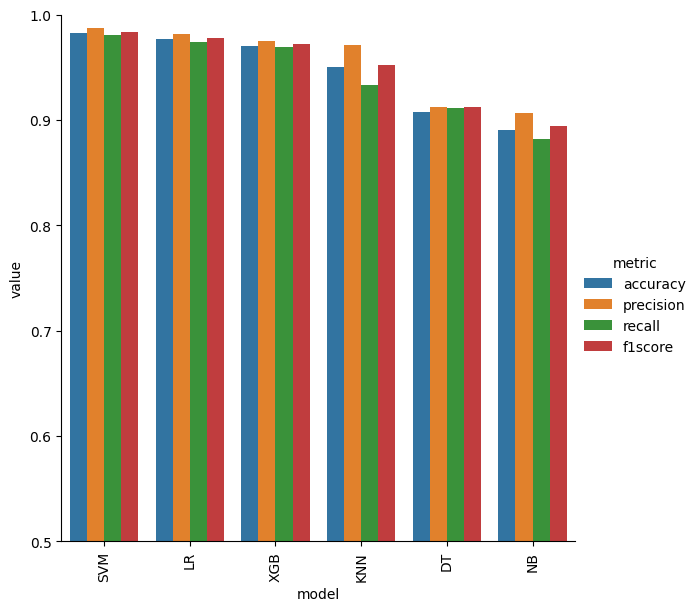

In [128]:
# Reshape the DataFrame to have 'model' as a column
model_df_melted = pd.melt(model_df, id_vars=['model'], var_name='metric', value_name='value')

# Plot using seaborn catplot
sns.catplot(x='model', y='value', hue='metric', data=model_df_melted, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# Manual testing

In [ ]:
def manual_testing(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the SVM model
    prob_svm = svm_model.predict_proba(padded_vector)[0][1]  # Probability for class 1
    prediction_svm = 1 if prob_svm > 0.5 else 0

    # Output the result
    if prediction_svm == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")
    print(f"Probability of being fake: {prob_svm:.2f}")


In [ ]:
sample_text = """From the original Wuhan variant, to Delta, to Omicron, and several others in between, the virus has continued to evolve.

New variants have driven repeated waves of infection and challenged doctors and scientists seeking to understand this changing virus’ behaviour.

Now, we are faced with a new group of variants, the so-called “FLiRT” variants, which appear to be contributing to a rising wave of COVID infections around Australia and elsewhere. So where have they come from, and are they cause for concern?

A descendant of Omicron

The FLiRT variants are a group of subvariants of JN.1 from the Omicron lineage."""

In [ ]:
manual_testing(sample_text)

The text is predicted to be: Fake
Probability of being fake: 0.67


# Export model

In [130]:
import pickle

In [132]:
path = '/content/drive/MyDrive/fake_news_detection/word2vec_google_news.pkl'

# Save the Word2Vec model
with open(path, "wb") as f:
    pickle.dump(wv, f)

In [131]:
# Pickle the SVM data
path = '/content/drive/MyDrive/fake_news_detection/svm_model.pkl'
with open(path, "wb") as f:
    pickle.dump(svm_model, f)